# Bibliotecas

In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

<h1>Carregando os Dados</h1>
<h3>
Vamos utilizar para este exercício a saída do exercício 1, a base pré processada, apenas com uma entrada por cliente e com uma coluna para os clusters.
</h3>

In [2]:
df = pd.read_csv("./df_ex1.csv")

In [3]:
df.head()

,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,prazoMedioRecebimentoVendas,titulosEmAberto,percentualRisco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,...,estoque,faturamentoBruto,margemBruta,custos,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,kmeans
0,IYZA05872767332466,2,0.000000,0,0.0,0.283019,437853.0,272388.0,450614.0,178225.0,...,201085.0,624350.0,-3319.0,-431401.0,40000.0,False,True,0.0,10800.0,2
1,MJEK50274612793018,7,0.387733,63,10368.0,0.283019,382348.0,890140.0,627034.0,460656.0,...,212674.0,1177807.0,0.0,0.0,50000.0,False,True,1.0,44000.0,1
2,FECA48063802482890,19,0.000000,0,0.0,0.320755,714851.0,188269.0,728846.0,1402031.0,...,0.0,1249651.0,302367.0,2183996.0,100000.0,False,True,0.0,165850.0,2
3,PMQC81082938911940,28,0.000000,0,0.0,0.358491,95762.0,293393.0,4786692.0,4493298.0,...,1195553.0,5368371.0,1346068.0,2072196.0,500000.0,False,True,0.0,194114.0,2
4,OGWM99265986867408,0,0.385918,0,0.0,0.283019,911113.0,509051.0,926368.0,451271.0,...,619908.0,572776.0,0.0,0.0,80000.0,False,True,1.0,63000.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cnpjSemTraco                 1523 non-null   object 
 1   maiorAtraso                  1523 non-null   int64  
 2   margemBrutaAcumulada         1523 non-null   float64
 3   prazoMedioRecebimentoVendas  1523 non-null   int64  
 4   titulosEmAberto              1523 non-null   float64
 5   percentualRisco              1523 non-null   float64
 6   ativoCirculante              1523 non-null   float64
 7   passivoCirculante            1523 non-null   float64
 8   totalAtivo                   1523 non-null   float64
 9   totalPatrimonioLiquido       1523 non-null   float64
 10  endividamento                1523 non-null   float64
 11  duplicatasAReceber           1523 non-null   float64
 12  estoque                      1523 non-null   float64
 13  faturamentoBruto  

<h1>Árvore de Decisão</h1>

<h2>
Com o banco acima vamos preparar a entrada para o nosso modelo escolhido.<BR>
Vamos dividir a base em treino e teste com 70% para o treino.<BR>
</h2>

In [5]:
x = df.drop(['cnpjSemTraco', 'kmeans'], axis=1)
y = df.kmeans

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

<h2>Criando e treinando o modelo</h2>

In [7]:
dtf = DecisionTreeClassifier(random_state=42)
clf_tree = dtf.fit(x_train, y_train)

<h2>
Visualização da árvore
</h2>

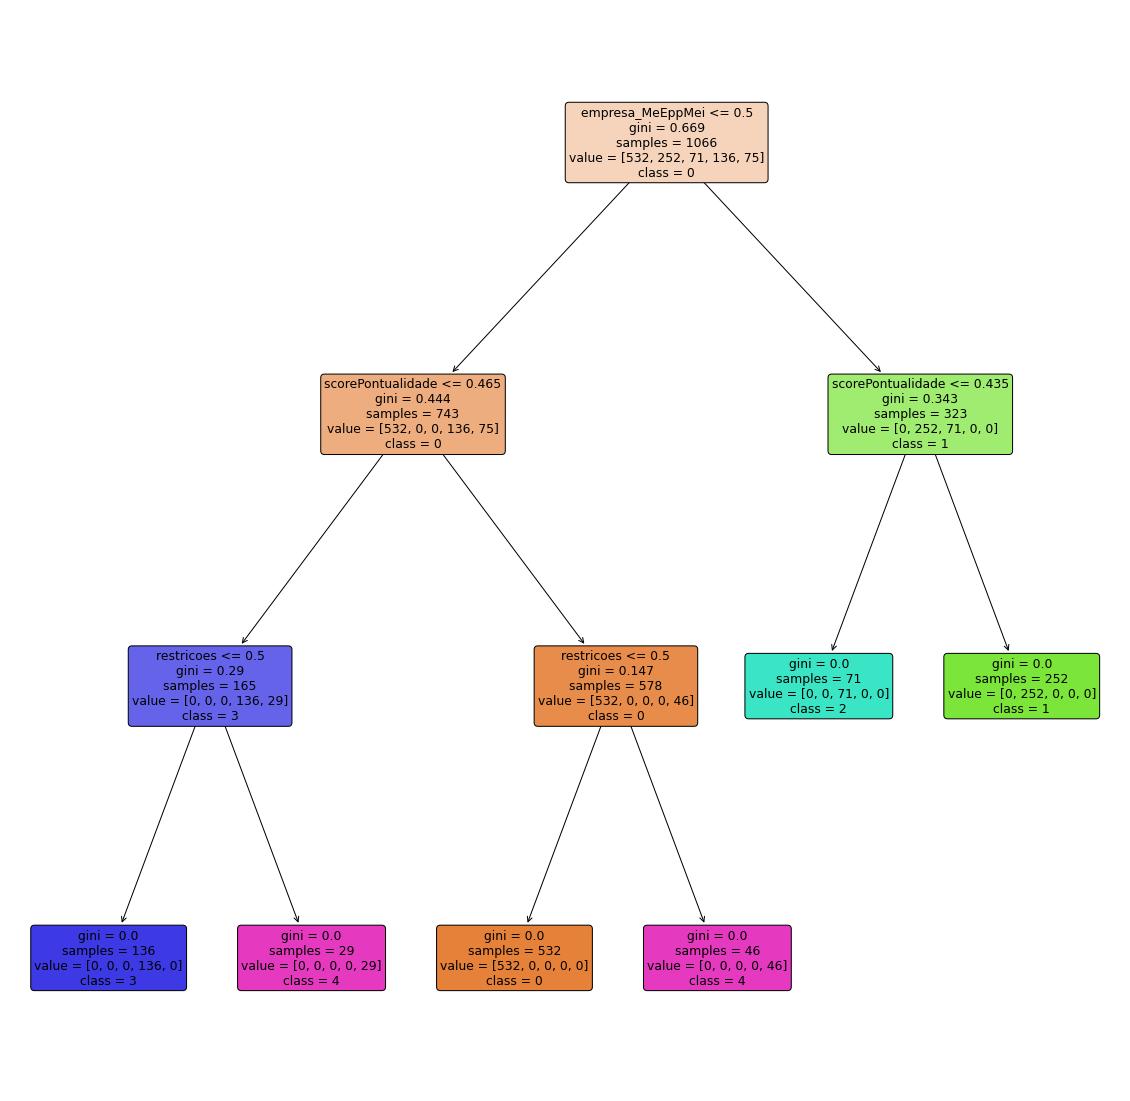

In [8]:
fig = plt.figure(figsize=(20,20))
tree = plot_tree(clf_tree, feature_names=x_train.columns, rounded=True, class_names=['0', '1', '2', '3', '4'], filled=True)

<h1>
Análise do Modelo
</h1>

In [9]:
#clf_tree.score(x_test, y_test)
y_pred = clf_tree.predict(x_test)
y_p_train = clf_tree.predict(x_train)
print(f"R2 score do treino: {round(r2_score(y_train, y_p_train), 4)}")
print(f"R2 score do teste: {round(r2_score(y_test, y_pred), 4)}")

R2 score do treino: 1.0
R2 score do teste: 0.9988


<h2>
O R2 score do nosso modelo está ótimo!
</h2>
<h3>
Vamos agora fazer alguns testes com dados aleatórios para testar a performance do modelo.
</h3>

<h2>
Carregando a base pré processada completa.
</h2>
<h3>
e sempre que um dados for carregado no formato dela precisará ter as colunas abaixo removidas
</h3>

In [10]:
df_teste = pd.read_csv("./df_pre_processado.csv")

df_teste.shape

(6012, 38)

In [11]:
df_teste.drop(['cnpjSemTraco', 'valorAprovado', 'valorSolicitado', 'dataAprovadoEmComite', 'dataAprovadoNivelAnalista', 'numero_solicitacao',
         'razaoSocial', 'nomeFantasia', 'status', 'definicaoRisco', 'diferencaPercentualRisco', 'dashboardCorrelacao',
         'periodoBalanco', 'primeiraCompra', 'intervaloFundacao', 'periodoDemonstrativoEmMeses'], axis=1, inplace=True)

<h2>Amostra para teste</h2>

In [12]:
numero = np.random.random_integers(df_teste.shape[0])
amostra = df_teste.iloc[numero,:]
amostra


maiorAtraso                            0
margemBrutaAcumulada                 0.0
percentualProtestos                  NaN
prazoMedioRecebimentoVendas            0
titulosEmAberto                      0.0
percentualRisco                 0.196429
ativoCirculante                 769856.0
passivoCirculante               549050.0
totalAtivo                      776097.0
totalPatrimonioLiquido          227046.0
endividamento                    16719.0
duplicatasAReceber               16508.0
estoque                         661509.0
faturamentoBruto               4249093.0
margemBruta                     684718.0
custos                         3564375.0
anoFundacao                       2017.0
capitalSocial                    50000.0
restricoes                         False
empresa_MeEppMei                   False
scorePontualidade                    0.0
limiteEmpresaAnaliseCredito       6480.0
Name: 4843, dtype: object

<h1>Teste do cluster 0</h1>

In [13]:
df_k = df[df.kmeans == 0]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

maiorAtraso                            4
margemBrutaAcumulada            0.479469
prazoMedioRecebimentoVendas           18
titulosEmAberto                 54535.26
percentualRisco                 0.089286
ativoCirculante                 551493.0
passivoCirculante               225850.0
totalAtivo                      551493.0
totalPatrimonioLiquido          267781.0
endividamento                    42886.0
duplicatasAReceber              133560.0
estoque                         108133.0
faturamentoBruto               1853472.0
margemBruta                     441060.0
custos                         1412412.0
capitalSocial                    10000.0
restricoes                         False
empresa_MeEppMei                   False
scorePontualidade                    1.0
limiteEmpresaAnaliseCredito      19980.0
Name: 949, dtype: object

In [14]:
amostra = np.array(amostra).reshape(1,-1)
print(f"Cluster Previsto: {clf_tree.predict(amostra)[0]}")

Cluster Previsto: 0


<h1>Teste do cluster 1</h1>

In [15]:
df_k = df[df.kmeans == 1]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

maiorAtraso                            0
margemBrutaAcumulada            0.353765
prazoMedioRecebimentoVendas            0
titulosEmAberto                      0.0
percentualRisco                 0.142857
ativoCirculante                1325171.0
passivoCirculante               117188.0
totalAtivo                     1325171.0
totalPatrimonioLiquido         1207982.0
endividamento                        0.0
duplicatasAReceber               94656.0
estoque                         948053.0
faturamentoBruto               1553580.0
margemBruta                     686205.0
custos                          867375.0
capitalSocial                   100000.0
restricoes                         False
empresa_MeEppMei                    True
scorePontualidade                    1.0
limiteEmpresaAnaliseCredito     122100.0
Name: 404, dtype: object

In [16]:
amostra = np.array(amostra).reshape(1,-1)
print(f"Cluster Previsto: {clf_tree.predict(amostra)[0]}")

Cluster Previsto: 1


<h1>Teste do cluster 2</h1>

In [24]:
df_k = df[df.kmeans == 2]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

maiorAtraso                            0
margemBrutaAcumulada                 0.0
prazoMedioRecebimentoVendas            0
titulosEmAberto                      0.0
percentualRisco                 0.428571
ativoCirculante                      0.0
passivoCirculante                    0.0
totalAtivo                           0.0
totalPatrimonioLiquido               0.0
endividamento                        0.0
duplicatasAReceber                   0.0
estoque                              0.0
faturamentoBruto               1391760.0
margemBruta                          0.0
custos                               0.0
capitalSocial                    88000.0
restricoes                         False
empresa_MeEppMei                    True
scorePontualidade                    0.0
limiteEmpresaAnaliseCredito      59400.0
Name: 656, dtype: object

In [25]:
amostra = np.array(amostra).reshape(1,-1)
print(f"Cluster Previsto: {clf_tree.predict(amostra)[0]}")

Cluster Previsto: 2


<h1>Teste do cluster 3</h1>

In [19]:
df_k = df[df.kmeans == 3]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

maiorAtraso                            0
margemBrutaAcumulada                 0.0
prazoMedioRecebimentoVendas            0
titulosEmAberto                      0.0
percentualRisco                 0.053571
ativoCirculante                4345363.0
passivoCirculante              4106484.0
totalAtivo                     6738012.0
totalPatrimonioLiquido         2631527.0
endividamento                        0.0
duplicatasAReceber             1804196.0
estoque                              0.0
faturamentoBruto               9046276.0
margemBruta                    3676928.0
custos                         5369348.0
capitalSocial                    50000.0
restricoes                         False
empresa_MeEppMei                   False
scorePontualidade                    0.0
limiteEmpresaAnaliseCredito     425500.0
Name: 117, dtype: object

In [20]:
amostra = np.array(amostra).reshape(1,-1)
print(f"Cluster Previsto: {clf_tree.predict(amostra)[0]}")

Cluster Previsto: 3


<h1>Teste do cluster 4</h1>

In [21]:
df_k = df[df.kmeans == 4]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

maiorAtraso                             3
margemBrutaAcumulada             0.548103
prazoMedioRecebimentoVendas             0
titulosEmAberto                       0.0
percentualRisco                  0.214286
ativoCirculante                       0.0
passivoCirculante                     0.0
totalAtivo                            0.0
totalPatrimonioLiquido                0.0
endividamento                         0.0
duplicatasAReceber                    0.0
estoque                               0.0
faturamentoBruto               26663171.0
margemBruta                           0.0
custos                                0.0
capitalSocial                    700000.0
restricoes                           True
empresa_MeEppMei                    False
scorePontualidade                     1.0
limiteEmpresaAnaliseCredito      206760.0
Name: 1405, dtype: object

In [22]:
amostra = np.array(amostra).reshape(1,-1)
print(f"Cluster Previsto: {clf_tree.predict(amostra)[0]}")

Cluster Previsto: 4
